In [1]:
import pandas as pd
file_path =  r"C:\Users\supri\Downloads\preprocedata.csv"
df = pd.read_csv(file_path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   bmi                  100000 non-null  float64
 2   HbA1c_level          100000 non-null  float64
 3   blood_glucose_level  100000 non-null  float64
 4   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 3.8 MB


,age,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.713683,0.177171,0.941427,0.820981,0
1,1.480391,0.202031,0.941427,0.693147,0
2,1.175563,0.202031,0.875469,0.856348,0
3,1.279616,0.156863,0.820981,0.850539,0
4,1.681147,0.118231,0.804851,0.850539,0


In [2]:
df["diabetes"].value_counts(normalize=True)

diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

In [3]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["diabetes"])
y = df["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(diabetes
 0    0.915
 1    0.085
 Name: proportion, dtype: float64,
 diabetes
 0    0.915
 1    0.085
 Name: proportion, dtype: float64)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score

models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
recall_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall_scores[name] = recall_score(y_test, y_pred)

sorted_recall_scores = dict(sorted(recall_scores.items(), key=lambda x: x[1], reverse=True))
sorted_recall_scores

{'Logistic Regression': 0.8894117647058823,
 'Random Forest': 0.7023529411764706,
 'Gradient Boosting': 0.6741176470588235}

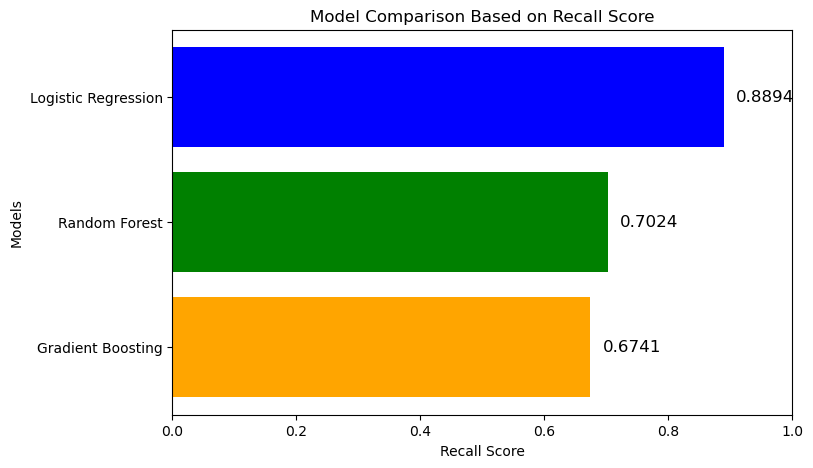

In [16]:
import matplotlib.pyplot as plt

model_names = list(sorted_recall_scores.keys())
recall_values = list(sorted_recall_scores.values())

plt.figure(figsize=(8, 5))
plt.barh(model_names, recall_values, color=['blue', 'green', 'orange'])

plt.xlabel("Recall Score")
plt.ylabel("Models")
plt.title("Model Comparison Based on Recall Score")
plt.xlim(0, 1) 
plt.gca().invert_yaxis()  

for index, value in enumerate(recall_values):
    plt.text(value + 0.02, index, f"{value:.4f}", va='center', fontsize=12)
plt.show()

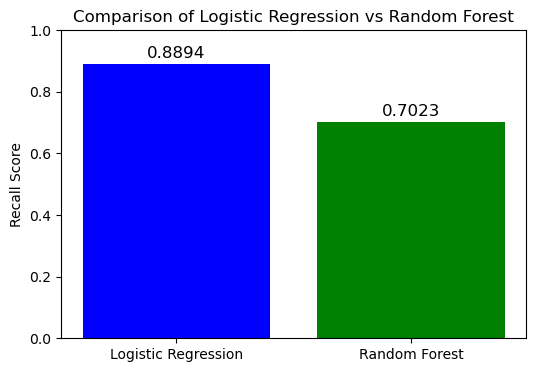

In [18]:
import matplotlib.pyplot as plt

rf_recall = 0.7023 
models = ["Logistic Regression", "Random Forest"]
recall_scores = [0.8894, rf_recall]

plt.figure(figsize=(6, 4))
plt.bar(models, recall_scores, color=["blue", "green"])

plt.ylabel("Recall Score")
plt.title("Comparison of Logistic Regression vs Random Forest")
plt.ylim(0, 1) 
for index, value in enumerate(recall_scores):
    plt.text(index, value + 0.02, f"{value:.4f}", ha="center", fontsize=12)

plt.show()

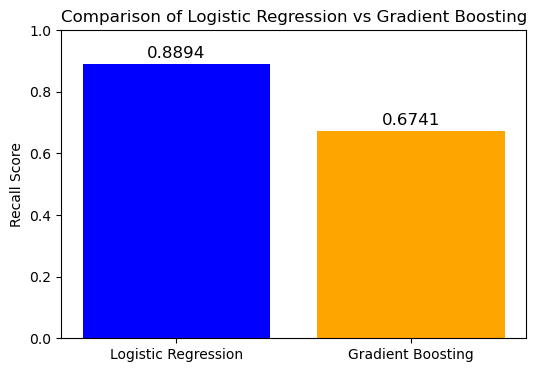

In [20]:
import matplotlib.pyplot as plt

gb_recall = 0.6741 

models = ["Logistic Regression", "Gradient Boosting"]
recall_scores = [0.8894, gb_recall]

plt.figure(figsize=(6, 4))
plt.bar(models, recall_scores, color=["blue", "orange"])

plt.ylabel("Recall Score")
plt.title("Comparison of Logistic Regression vs Gradient Boosting")
plt.ylim(0, 1)  

for index, value in enumerate(recall_scores):
    plt.text(index, value + 0.02, f"{value:.4f}", ha="center", fontsize=12)

plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_lr = best_lr.predict(X_test)  
y_pred_rf = best_rf.predict(X_test)  
y_pred_gb = best_gb.predict(X_test)  

models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (model_name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred) 
    disp = ConfusionMatrixDisplay(cm)  
    disp.plot(ax=axes[i], cmap="Blues")  
    axes[i].set_title(model_name)  

plt.tight_layout()
plt.show()

NameError: name 'best_lr' is not defined

In [23]:
logistic_model = LogisticRegression(class_weight="balanced")
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_lr = logistic_model.predict(X_test)  
y_pred_rf = rf_model.predict(X_test) 
y_pred_gb = gb_model.predict(X_test)  

models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (model_name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred) 
    disp = ConfusionMatrixDisplay(cm)  
    disp.plot(ax=axes[i], cmap="Blues")  
    axes[i].set_title(model_name)  

plt.tight_layout()
plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

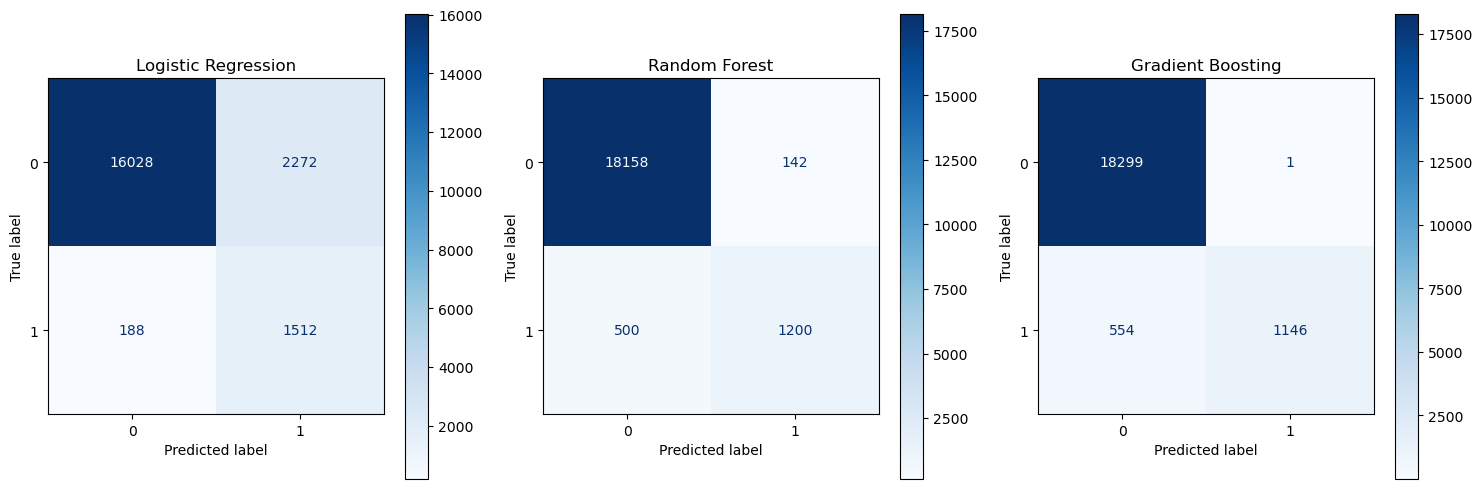

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_lr = logistic_model.predict(X_test)  
y_pred_rf = rf_model.predict(X_test)  
y_pred_gb = gb_model.predict(X_test)  

models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (model_name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)  
    disp = ConfusionMatrixDisplay(cm)  
    disp.plot(ax=axes[i], cmap="Blues")  
    axes[i].set_title(model_name)  

plt.tight_layout()
plt.show()